In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mri = pd.read_csv('phenotype/Parameters_n1601.csv')
age = pd.read_csv('phenotype/Interview_Dates_Update.csv')
phenotype = pd.read_csv('phenotype/Subject_Phenotypes.csv',
                        usecols=['SUBJID', 'Race', 'Sex'])

# drop proband+collateral interview duplicates
phenotype.drop_duplicates('SUBJID', inplace=True)

In [3]:
subjids = mri.loc[mri['Sequence.Name'] == 'FMRI_BOLD_rest'].SUBJID

# not in dbGaP for whatever reason
subjids = subjids.drop(subjids[(subjids == 600097734231) | (subjids == 600745271704)].index)

len(subjids)

1395

In [4]:
subs = pd.merge(age.loc[age.SUBJID.isin(subjids)], phenotype, on='SUBJID')

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(subs, test_size=1/3, random_state=44)

# Demographics

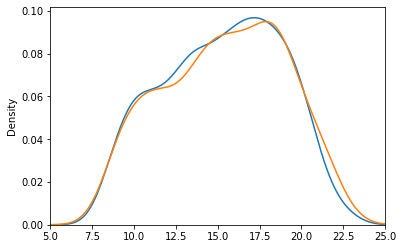

In [6]:
fig, ax = plt.subplots()

(train['ageAtScan'] / 12).plot.kde(ax=ax)
(test['ageAtScan'] / 12).plot.kde(ax=ax)

ax.set_xlim(5, 25)
ax.set_ylim(bottom=0)

plt.show()

In [7]:
len(train), sum(train['Sex'] == 'F') / len(train)

(930, 0.5365591397849462)

In [8]:
len(test), sum(test['Sex'] == 'F') / len(test)

(465, 0.5290322580645161)

In [9]:
(sum(train['Race'].str.contains('EA', na=False)) / len(train),
 sum(train['Race'].str.contains('AA', na=False)) / len(train))

(0.5075268817204301, 0.4838709677419355)

In [10]:
(sum(test['Race'].str.contains('EA', na=False)) / len(test),
 sum(test['Race'].str.contains('AA', na=False)) / len(test))

(0.524731182795699, 0.4666666666666667)

# Export

In [11]:
np.save('output/train_subjids.npy', train.SUBJID)
np.save('output/test_subjids.npy', test.SUBJID)